# Init

In [1]:
INIT = False
GET_GIT_LIB = False

if INIT:
    !pip install dolphins_recognition_challenge

if GET_GIT_LIB:
    !git clone https://github.com/luciantin-ml/delfini
    !mv ./delfini/lib ./
    #  !rm -rf ./delfini

# Libs

In [2]:
from lib.dataLoader import *
from lib.models import *
from lib.train import train_model
from dolphins_recognition_challenge.datasets import display_batches

# Data loaders

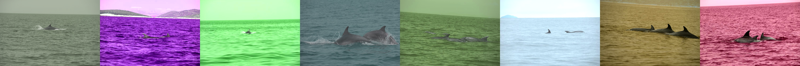

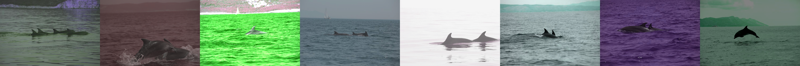

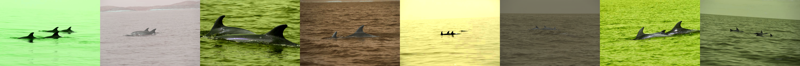

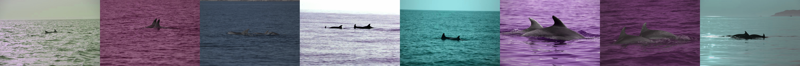

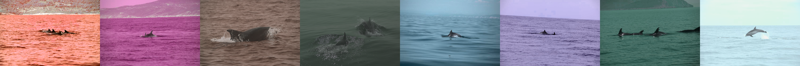

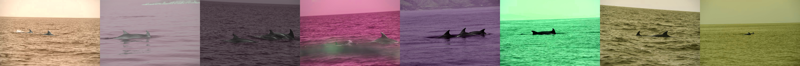

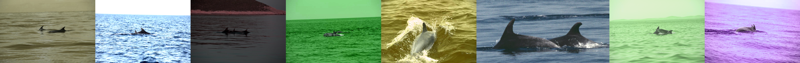

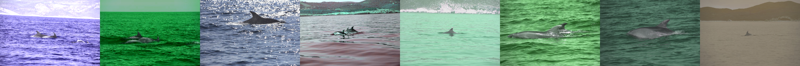

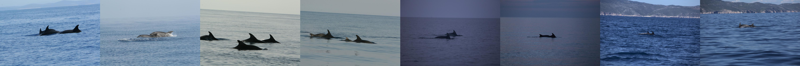

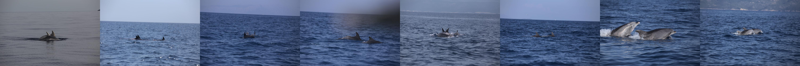

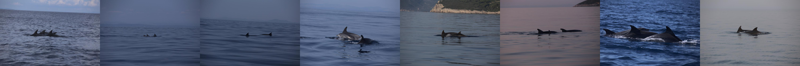

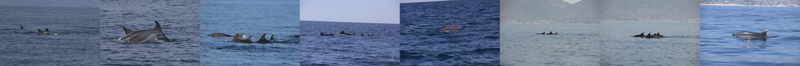

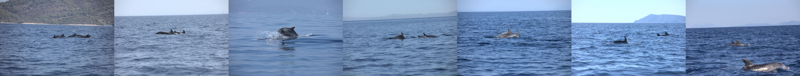

In [3]:
data_loader, data_loader_test = get_data_loader(8)

display_batches(data_loader, n_batches=8)
display_batches(data_loader_test, n_batches=8)

# Setup

In [4]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")



# Train

In [8]:
model = model_maskrcnn_resnet50()
model.to(device)

params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)

lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

In [9]:
num_epochs = 1

train_model(num_epochs, model, optimizer, lr_scheduler, device, data_loader, data_loader_test)

Epoch #0


KeyboardInterrupt: 

In [ ]:
from dolphins_recognition_challenge.instance_segmentation.model import show_prediction, iou_metric_example, \
    train_one_epoch, show_predictions

for i in range(4):
    iou_test_image = iou_metric_example(model, data_loader_test.dataset[i], 0.5)
    img, _ = data_loader_test.dataset[i]
    print(f"IOU metric for the input image is: {iou_test_image}")
    show_prediction(model, img, width=820)


from dolphins_recognition_challenge.instance_segmentation.model import iou_metric, show_predictions_sorted_by_iou

mean_iou_testset, _ = iou_metric(model, data_loader_test.dataset)

print(f"Mean IOU metric for the test set is: {mean_iou_testset}")